# Current Issues

## D-Wave vs Qiskit


## Dependencies: 

pip install dimod
pip install pylatexenc

In [2]:
import numpy as np
import dimod
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

 # %% 
# User input for number of cities
num_cities = int(input("Enter the number of cities: "))
num_steps = num_cities  # One step per city

# User input for distance matrix (Each row should be entered separately)
print("Enter the distance matrix row by row. Each row should be space-separated.")

# Initialize the distance matrix
distance_matrix = np.zeros((num_cities, num_cities))

# Take matrix input row by row
for i in range(num_cities):
    while True:
        try:
            row = input(f"Enter row {i + 1} (space-separated distances): ")
            row_values = list(map(float, row.split()))  # Convert to a list of floats
            if len(row_values) != num_cities:
                print(f"Error: There should be {num_cities} values in row {i + 1}. Please try again.")
                continue
            distance_matrix[i] = row_values
            break
        except ValueError:
            print("Invalid input. Please enter numeric values separated by spaces.")

# Ensure the matrix is symmetric (distance[i][j] == distance[j][i]) and no self-loops
np.fill_diagonal(distance_matrix, 0)

# Plot Heatmap of Distance Matrix with correct formatting
plt.figure(figsize=(8, 6))
sns.heatmap(distance_matrix, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title("Distance Matrix Heatmap")
plt.xlabel("Cities")
plt.ylabel("Cities")
plt.tight_layout()
plt.show()

# Define QUBO dictionary
Q = {}

# Large penalty coefficient
A = 1000  

# Constraint 1: Each city is visited exactly once
for i in range(num_cities):
    for t in range(num_steps):
        Q[(i * num_steps + t, i * num_steps + t)] = -A  # Favor selecting one per row
    for t1 in range(num_steps):
        for t2 in range(t1 + 1, num_steps):
            Q[(i * num_steps + t1, i * num_steps + t2)] = A  # Penalize multiple visits

# Constraint 2: Each time slot has exactly one city
for t in range(num_steps):
    for i in range(num_cities):
        Q[(i * num_steps + t, i * num_steps + t)] = -A  # Favor selecting one per column
    for i1 in range(num_cities):
        for i2 in range(i1 + 1, num_cities):
            Q[(i1 * num_steps + t, i2 * num_steps + t)] = A  # Penalize multiple selections

# Objective function: Minimize travel cost
for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            for t in range(num_steps - 1):
                Q[(i * num_steps + t, j * num_steps + t + 1)] = distance_matrix[i, j]

# Solve using Simulated Annealing
sampler = dimod.SimulatedAnnealingSampler()
response = sampler.sample_qubo(Q, num_reads=100)

# Get the best solution
best_sample = response.first.sample
print("Best route:")
route = [None] * num_steps
for t in range(num_steps):
    for i in range(num_cities):
        if best_sample[i * num_steps + t] == 1:
            route[t] = i
            print(f"Step {t+1}: Visit City {i}")

# Print energy (objective value)
print("Energy (Cost):", response.first.energy)

# 3D visualization of the cities and optimal route
city_coordinates = np.random.rand(num_cities, 3) * 100  # Random 3D coordinates for cities

# Plot the route on a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot cities
ax.scatter(city_coordinates[:, 0], city_coordinates[:, 1], city_coordinates[:, 2], color='red', s=100, label="Cities")

# Plot the route
for t in range(1, num_steps):
    city1 = route[t - 1]
    city2 = route[t]
    ax.plot([city_coordinates[city1, 0], city_coordinates[city2, 0]], 
            [city_coordinates[city1, 1], city_coordinates[city2, 1]], 
            [city_coordinates[city1, 2], city_coordinates[city2, 2]], color='blue')

ax.set_title("Optimal Route (3D Visualization)")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_zlabel("Z Coordinate")
ax.legend()
plt.tight_layout()
plt.show()
 # %% 
# Save the results and plots in a PDF
with PdfPages("TSP_Results_3D.pdf") as pdf:
    # Plot Heatmap of Distance Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(distance_matrix, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
    plt.title("Distance Matrix Heatmap")
    plt.xlabel("Cities")
    plt.ylabel("Cities")
    plt.tight_layout()
    pdf.savefig()   
    plt.close()
 # %% 

    # Plot 3D Route
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(city_coordinates[:, 0], city_coordinates[:, 1], city_coordinates[:, 2], color='red', s=100, label="Cities")
    for t in range(1, num_steps):
        city1 = route[t - 1]
        city2 = route[t]
        ax.plot([city_coordinates[city1, 0], city_coordinates[city2, 0]], 
                [city_coordinates[city1, 1], city_coordinates[city2, 1]], 
                [city_coordinates[city1, 2], city_coordinates[city2, 2]], color='blue')

    ax.set_title("Optimal Route (3D Visualization)")
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_zlabel("Z Coordinate")
    ax.legend()
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # Save results summary
    plt.figure(figsize=(8, 6))
    plt.text(0.1, 0.8, f"Best Route: {route}", fontsize=12)
    plt.text(0.1, 0.7, f"Energy (Cost): {response.first.energy}", fontsize=12)
    plt.axis('off')
    pdf.savefig()
    plt.close()

Enter the number of cities:  da  


ValueError: invalid literal for int() with base 10: 'da  '

   ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.2 MB 682.7 kB/s eta 0:00:08
   ---------------------------------------- 0.1/5.2 MB 525.1 kB/s eta 0:00:10
    --------------------------------------- 0.1/5.2 MB 655.4 kB/s eta 0:00:08
   - -------------------------------------- 0.1/5.2 MB 787.7 kB/s eta 0:00:07
   - -------------------------------------- 0.2/5.2 MB 1.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.4/5.2 MB 1.3 MB/s eta 0:00:04
   ---- ----------------------------------- 0.6/5.2 MB 1.8 MB/s eta 0:00:03
   ------- -------------------------------- 1.0/5.2 MB 3.0 MB/s eta 0:00:02
   --------- ------------------------------ 1.2/5.2 MB 3.0 MB/s eta 0:00:02
   --------- -------------------

In [4]:
from qiskit import QuantumCircuit, transpile, assemble, execute
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Apply Hadamard gate to the first qubit
qc.h(0)

# Apply a CNOT gate (entanglement) between qubit 0 and qubit 1
qc.cx(0, 1)

# Measure the qubits
qc.measure([0, 1], [0, 1])

# Draw the circuit
qc.draw('mpl')

# Use the Aer simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit
job = execute(qc, simulator, shots=1|24)
result = job.result()

# Get the results
counts = result.get_counts(qc)

# Plot the results
plot_histogram(counts)
plt.show()


ImportError: cannot import name 'execute' from 'qiskit' (C:\Users\andre\anaconda3\Lib\site-packages\qiskit\__init__.py)

In [1]:
pip install qiskit




SyntaxError: invalid syntax (3380836758.py, line 1)

In [5]:
pip install --upgrade qiskit

Note: you may need to restart the kernel to use updated packages.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from qiskit.algorithms.minimum_eigensolvers import QAOA
from qiskit.algorithms.optimizers import COBYLA
from qiskit_optimization.applications import Maxcut
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit.primitives import Sampler
from qiskit_aer.primitives import Estimator  # New execution model

# Create a simple Max-Cut problem graph
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)])  # Define edges

# Visualize the graph
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

# Convert the Max-Cut problem to a Quadratic Program
max_cut = Maxcut(G)
qp = max_cut.to_quadratic_program()

# Convert Quadratic Program to QUBO (Qiskit's format)
qubo = QuadraticProgramToQubo().convert(qp)

# Define a Sampler (Replaces `execute`)
sampler = Sampler()
estimator = Estimator()  # New Qiskit Estimator for execution

# Use QAOA (Quantum Approximate Optimization Algorithm)
qaoa = QAOA(sampler=sampler, optimizer=COBYLA(), reps=2)

# Solve the problem using QAOA
result = qaoa.compute_minimum_eigenvalue(qubo.to_ising()[0])

# Print the results
print("Optimal solution:", result.optimal_point)
print("Optimal value:", result.optimal_value)

# Decode results into a classical solution
solution = max_cut.sample_most_likely(result.eigenstate)
print("Best cut:", solution)


ModuleNotFoundError: No module named 'qiskit.algorithms'

In [3]:
pip install --upgrade qiskit qiskit-algorithms qiskit-aer qiskit-optimization matplotlib


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 435.7 kB/s eta 0:00:19
   ---------------------------------------- 0.1/8.0 MB 744.7 kB/s eta 0:00:11
    --------------------------------------- 0.2/8.0 MB 1.0 MB/s eta 0:00:08
   - -------------------------------------- 0.2/8.0 MB 1.0 MB/s eta 0:00:08
   - -------------------------------------- 0.3/8.0 MB 1.1 MB/s eta 0:00:07
   - -------------------------------------- 0.3/8.0 MB 1.2 MB/s eta 0:00:07
   - -------------------------------------- 0.4/8.0 MB 1.1 MB/s eta 0:00:07
   -- ------------------------------------- 0.4/8.0 MB 1.2 MB/s eta 0:00:07
   -- ------------------------------------- 0.5/8.0 MB 1.2 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/8.0 MB 1.3 MB/s eta 0:00:06
   --- ------------------------------------ 0.6/8.0 MB 1.3 MB/s eta 0:00:06
   --- ---------------

<!-- Dependencies

D-WAVE vs Qiskit -->


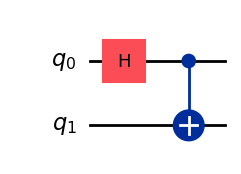

In [17]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [16]:
#from qiskit import algorithms,  VQE
import qiskit-algorithms

from qiskit-algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal
from qiskit.opflow import PauliSumOp
from qiskit.utils import QuantumInstance
from qiskit_aer import AerSimulator
 
ansatz = TwoLocal(2, 'ry', 'cz')
opt = SPSA(maxiter=50)
 
# shot-based simulation
backend = AerSimulator()
qi = QuantumInstance(backend=backend, shots=2048, seed_simulator=42)
vqe = VQE(ansatz, optimizer=opt, quantum_instance=qi)
 
hamiltonian = PauliSumOp.from_list([("XX", 1), ("XY", 1)])
result = vqe.compute_minimum_eigenvalue(hamiltonian)
 
print(result.eigenvalue)

SyntaxError: invalid syntax (3500283102.py, line 2)

In [8]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install qiskit-algorithms


Note: you may need to restart the kernel to use updated packages.
